In [1]:
from drt_solver.device import DRT, Measurement
from drt_solver.simulation import Simulation
import jax.numpy as jnp 
import pandas as pd

from fitting.optimizer import Optimizer
import matplotlib.pyplot as plt

from drt_solver_old.database import (ZARC, 
                                 gamma_ZARC)

In [11]:
# define the range of log frequencies
log_freq_min = -4.
log_freq_max = 4.

# define the range of log timescales with tau=1/f as in the previous papers
log_tau_min = -4  
log_tau_max = 4   

# number of collocation points in log(freq) and log(tau)
N_freqs = 10*int(log_freq_max-log_freq_min)+1
N_taus = 10*int(log_tau_max-log_tau_min)+1

# freq and tau vectors
freq = jnp.logspace(log_freq_min, log_freq_max, num = N_freqs, endpoint=True)
tau = jnp.flip(jnp.logspace(log_tau_min, log_tau_max, num = N_taus, endpoint=True))
log_tau_vec = jnp.log(tau)

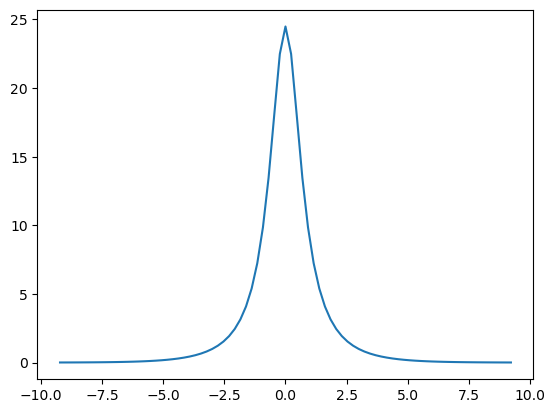

In [16]:
# the impedance and DRT of the single ZARC are calculated with the previous equations and the following parameters
R_0 = 10 # Ohm
R_ct = 50 # Ohm
phi = 0.8 # unitless
tau_0 = 1. # s

L_0 = 0.

gamma_guess = gamma_ZARC(tau, R_ct=R_ct, tau_0=tau_0, phi=phi)
plt.plot(jnp.log(tau), gamma_guess)

In [17]:
drt = DRT(R_0= R_0, L_0=L_0, gamma=gamma_guess, tau=tau)
simulation = Simulation(drt=drt, f_vec=freq)

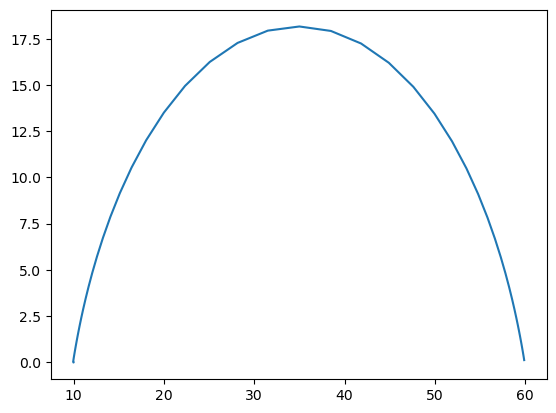

In [18]:
Z_re, Z_im = simulation.run()

plt.plot(Z_re, -Z_im)

plt.show()

In [19]:
data = [freq, Z_re, Z_im]
df = pd.DataFrame(data).transpose()  # Transpose to get columns instead of rows

# Step 3: Save the DataFrame to a CSV file without headers
csv_file_path = 'single_ZARC.csv'
df.to_csv(csv_file_path, header=False, index=False)

csv_file_path  # To display the path of the saved file

'single_ZARC.csv'

In [20]:
R_0 = 10
L_0 = 0.0

# define variables for exact
R_ct_1 = 50
phi_1 = 0.8
tau_1 = 0.1

# define variables for exact
R_ct_2 = 50
phi_2 = 0.8
tau_2 = 1e1

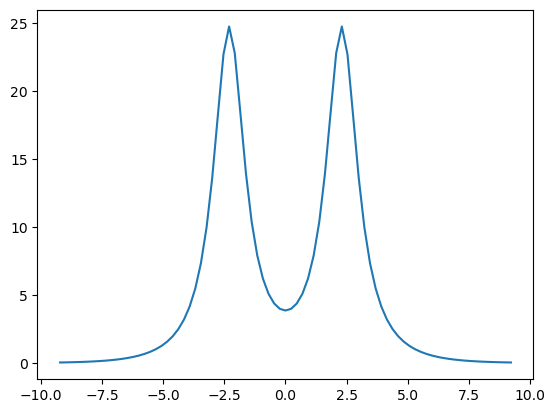

In [21]:
gamma_guess = gamma_ZARC(tau, R_ct=R_ct_1, tau_0=tau_1, phi=phi_1) + gamma_ZARC(tau, R_ct=R_ct_2, tau_0=tau_2, phi=phi_2)
plt.plot(jnp.log(tau), gamma_guess)

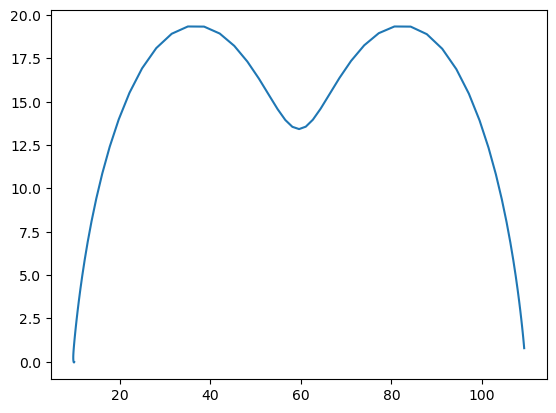

In [22]:
drt = DRT(R_0= R_0, L_0=L_0, gamma=gamma_guess, tau=tau)
simulation = Simulation(drt=drt, f_vec=freq)
Z_re, Z_im = simulation.run()

plt.plot(Z_re, -Z_im)

plt.show()

In [23]:
data = [freq, Z_re, Z_im]
df = pd.DataFrame(data).transpose()  # Transpose to get columns instead of rows

# Step 3: Save the DataFrame to a CSV file without headers
csv_file_path = 'double_ZARC.csv'
df.to_csv(csv_file_path, header=False, index=False)

csv_file_path  # To display the path of the saved file

'double_ZARC.csv'